In [1]:
## Calcular distribucion de grados

import networkx as nx
import powerlaw
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# 1. Crear un grafo
df = pd.read_csv('/home/mgonzalezpesquera/tfm/results/CONTROL_0.70_FINAL_default_edge.csv', delimiter=',')
G = nx.Graph()


# for index, row in df.iterrows():

for _, row in df.iterrows():
    source = str(row['Interaction']).strip()
    target = str(row['name']).strip()
    G.add_edge(source, target)

#     G.add_edge(row['GeneA'], row['GeneB'])
#df = df[df['Interaction'].str.contains(',')]
#for x in df.Interaction:
#     spl = x.split(",")
#     G.add_edge(spl[0], spl[1])
     #print(spl)

In [4]:

# 2. Calcular la distribución de grados
degrees = [degree for node, degree in G.degree()]


In [5]:
print("Lista de grados:", degrees)
print("Cantidad total de nodos:", len(degrees))
print("Grados únicos:", set(degrees))
print("Cantidad de grados únicos:", len(set(degrees)))


Lista de grados: [1, 249, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 211, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 344, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [6]:

# 3. Usar la biblioteca powerlaw para ajustar la ley de potencia
fit = powerlaw.Fit(degrees, discrete=True)  # Ajuste de la ley de potencia

# Obtener el valor de gamma
gamma = fit.power_law.alpha
print(f'El valor de gamma es: {gamma:.4f}')


Calculating best minimal value for power law fit
El valor de gamma es: 3.8865


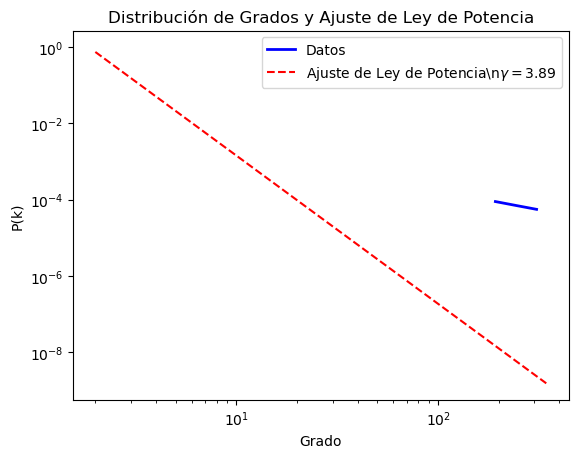

In [7]:
# 4. Visualizar la distribución y el ajuste de la ley de potencia
fig = fit.plot_pdf(color='b', linewidth=2, label='Datos')  # Plot de los datos de la distribución de grados
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig, label=rf'Ajuste de Ley de Potencia\n$\gamma = {gamma:.2f}$')
plt.xlabel('Grado')
plt.ylabel('P(k)')
plt.legend()
plt.title('Distribución de Grados y Ajuste de Ley de Potencia')
plt.savefig('CONTROL_0.55_FINAL_distribucion_grados.png', dpi=300, bbox_inches='tight') 
plt.show()